<a href="https://colab.research.google.com/github/indy041039/Kaggle-Titanic/blob/master/DSE_Machine_Learning_Pipeline_Example_Week3_Tuesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Dataset

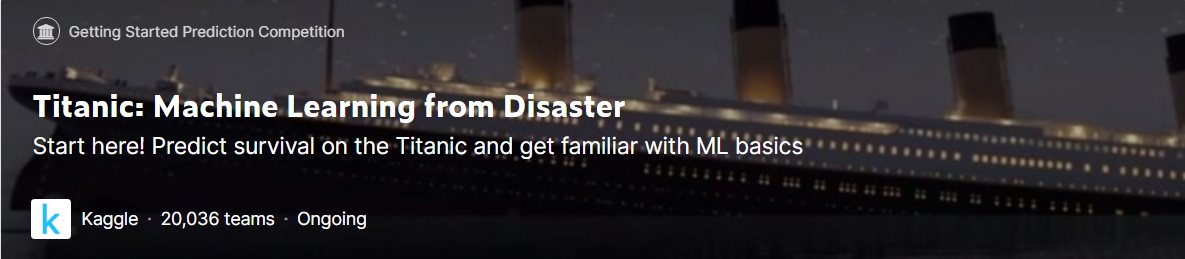

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, KBinsDiscretizer
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.decomposition import PCA

##Download dataset from Kaggle via Kaggle API

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ardong","key":"c56c6df5ccf79471e5f9e15fdaeda068"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 10.7MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 1.50MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 61.6MB/s]


##Import dataset

In [ ]:
def load_data():
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    return train_df, test_df

In [ ]:
train_df, test_df = load_data()

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Hypothesis
* Cabin มี missing values เยอะมากๆ อาจจะตัดทิ้ง แต่ลองไปเทียบกับ Embarked ก่อน น่าจะมีความสัมพันธ์กัน
* PassengerId, Ticket ไม่น่ามีผลอะไร ตัดทิ้ง
* PClass, Name, Fare, Embarked บอกฐานะทางการเงิน
* Sex, Age, SipSp, Parch บอกลักษณะและครอบครัวของแต่ละคน




## Explanatory Data Analysis (EDA)


* ทำความเข้าใจ หา insight ของข้อมูล
* ทดลองบน train dataset



In [ ]:
data = train_df.copy()

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

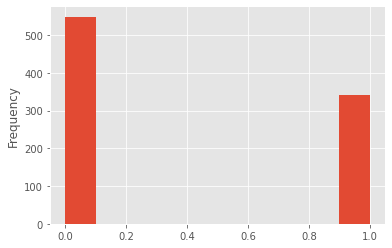

In [ ]:
data['Survived'].plot(kind='hist')

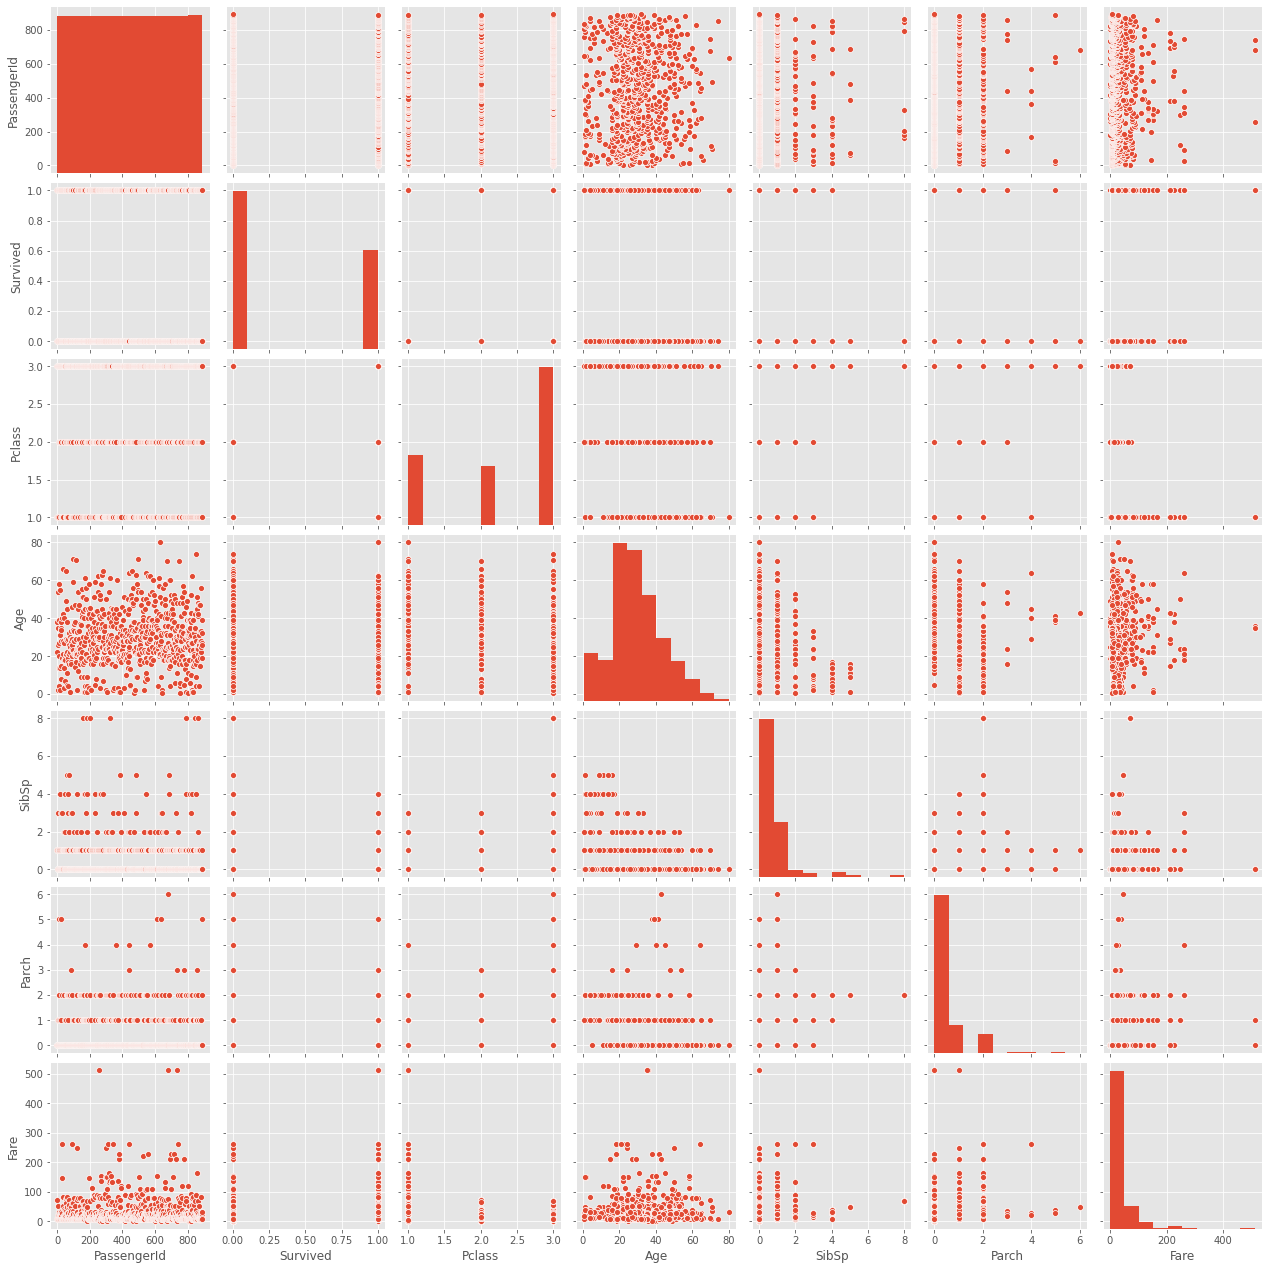

In [ ]:
sns.pairplot(data)

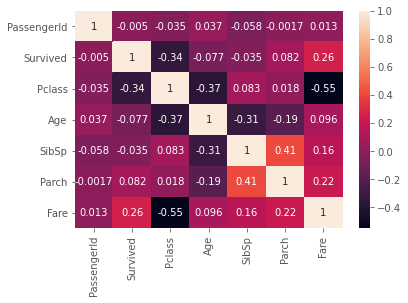

In [ ]:
sns.heatmap(data.corr(), annot=True)

### Pclass and Fare

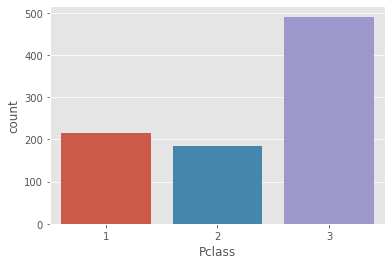

In [ ]:
sns.countplot(x='Pclass', data=data)

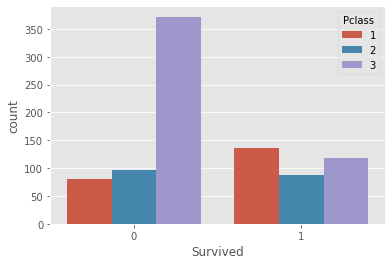

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=data)

In [ ]:
data.groupby('Pclass').mean()[['Survived','Age','SibSp','Parch','Fare']]

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


* class 1 มีโอกาสรอดมากกว่า 2 และ 3
* อายุ class 2 และ 3 ใกล้เคียงกัน class 1 จะเป็นคนมีอายุหน่อย
* Fare แตกต่างกันอย่างเห็นได้ชัด

In [ ]:
data_pclass = data.groupby('Pclass').mean()
data_pclass = data_pclass[['Fare']].rename(columns={'Fare':'Average_Fare'})
data_pclass

,Average_Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [ ]:
data = pd.merge(data, data_pclass, on='Pclass', how='inner')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Average_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13.67555
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13.67555
2,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13.67555
3,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,13.67555
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,13.67555


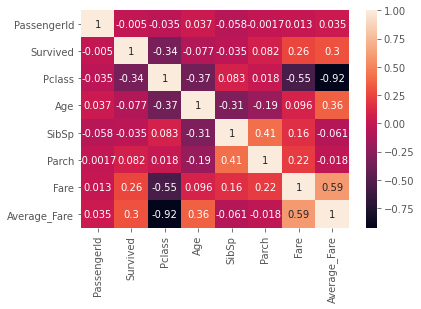

In [ ]:
sns.heatmap(data.corr(), annot=True)

Text(0.5, 1.0, 'with log transformation')

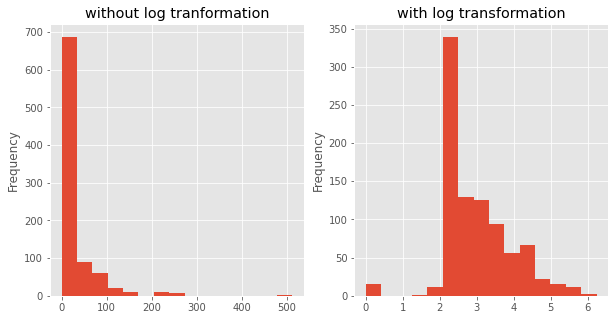

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax1 = data['Fare'].plot(kind='hist', bins=15)
plt.title('without log tranformation')

plt.subplot(1,2,2)
data['Fare'].apply(lambda x: np.log(x+1)).plot(kind='hist', bins=15)
plt.title('with log transformation')

In [ ]:
data['log_Fare'] = data['Fare'].apply(lambda x: np.log(x+1))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Average_Fare,log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13.67555,2.110213
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13.67555,2.188856
2,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13.67555,2.202765
3,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,13.67555,2.246893
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,13.67555,3.094446


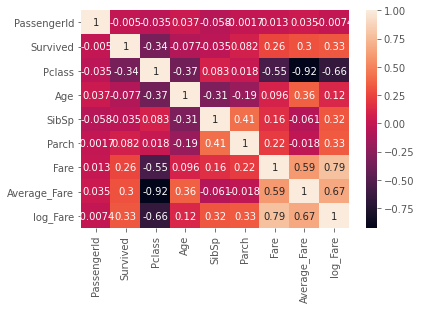

In [ ]:
sns.heatmap(data.corr(), annot=True)

### Sex, Age and Family

In [ ]:
data = train_df.copy()

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


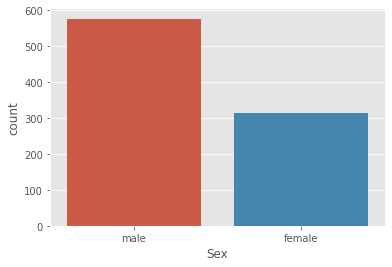

In [ ]:
sns.countplot(x='Sex', data=data)

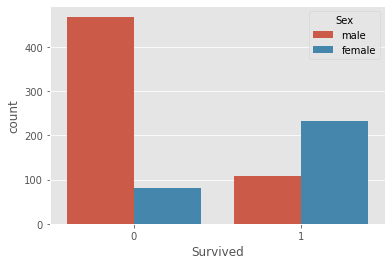

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=data)

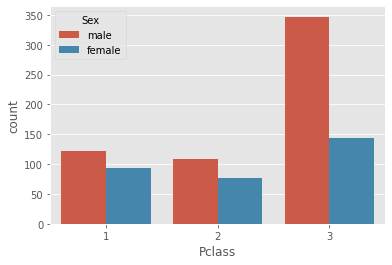

In [ ]:
sns.countplot(x='Pclass', hue='Sex', data=data)

In [ ]:
print('Survived Rate (Suvivor/All) per sex')
print('Male: {}'.format(data[data['Sex']=='male']['Survived'].mean()))
print('Female: {}'.format(data[data['Sex']=='female']['Survived'].mean()))

Survived Rate (Suvivor/All) per sex
Male: 0.18890814558058924
Female: 0.7420382165605095


* ผู้ชาย class 3 มีโอกาสตายสูงที่สุด
* ผู้หญิงมีโอกาสรอดมากกว่าผู้ชาย

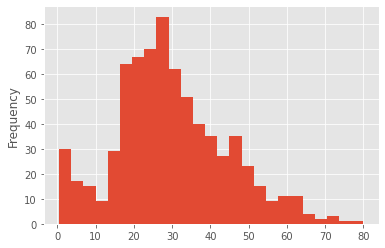

In [ ]:
data['Age'].plot(kind='hist', bins=25)

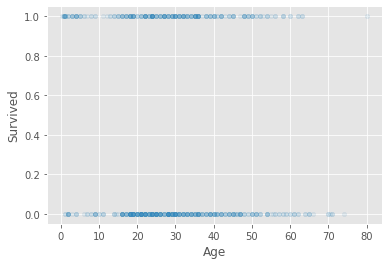

In [ ]:
data.plot(kind='scatter', x='Age', y='Survived', alpha=0.1)

In [ ]:
age_mean = data['Age'].mean()
data['Age_fill_mean'] = data['Age'].fillna(age_mean)

In [ ]:
age_nan =  (data['Age'].isna())
age_rand = data[~age_nan]['Age']
np.random.seed(0)
age_rand_ = np.random.choice(age_rand, size=sum(age_nan), replace=True)
data['Age_fill_rand'] = data['Age']
data.loc[age_nan, 'Age_fill_rand'] = age_rand_

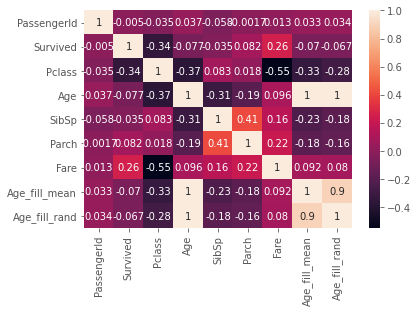

In [ ]:
sns.heatmap(data.corr(), annot=True)

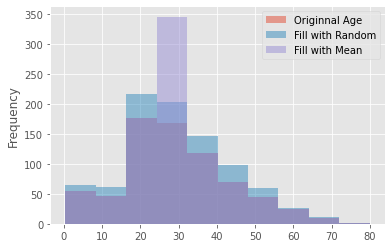

In [ ]:
data['Age'].plot(kind='hist', alpha=0.5)
data['Age_fill_rand'].plot(kind='hist', alpha=0.5)
data['Age_fill_mean'].plot(kind='hist', alpha=0.5)
plt.legend(['Originnal Age', 'Fill with Random', 'Fill with Mean'])


In [ ]:
k_bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
k_bins.fit(data['Age_fill_rand'].values.reshape(-1,1))
data['Age_fill_rand_discrete'] = k_bins.transform(data['Age_fill_rand'].values.reshape(-1,1))

In [ ]:
k_bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
k_bins.fit(data['Age_fill_mean'].values.reshape(-1,1))
data['Age_fill_mean_discrete'] = k_bins.transform(data['Age_fill_mean'].values.reshape(-1,1))

In [ ]:
data['log_Age'] = data['Age_fill_mean'].apply(lambda x: np.log(x+1))

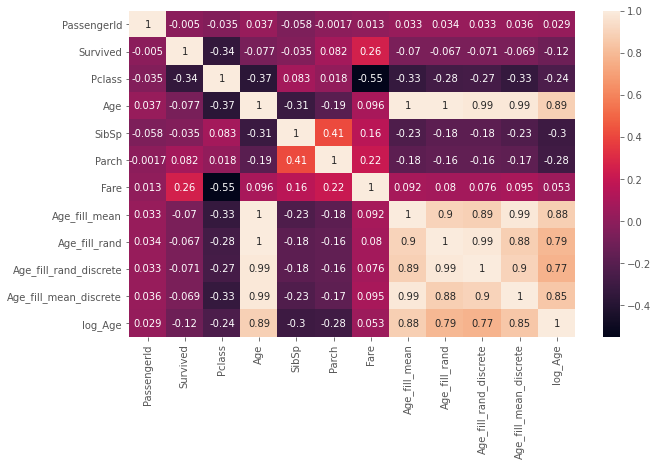

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)



*   ลอง fillna ด้วย mean และ power transform ด้วย np.log
*   optional คือ fillna ด้วย random



In [ ]:
data = train_df.copy()

Text(0.5, 1.0, 'Family')

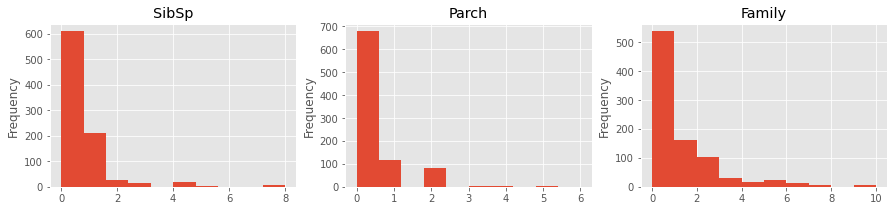

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
data['SibSp'].plot(kind='hist')
plt.title('SibSp')

plt.subplot(1,3,2)
data['Parch'].plot(kind='hist')
plt.title('Parch')

plt.subplot(1,3,3)
data['Family'] = data['Parch']+data['SibSp']
data['Family'].plot(kind='hist')
plt.title('Family')

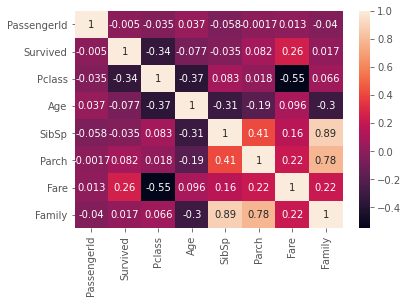

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
data['log_Parch'] = data['Parch'].apply(lambda x: np.log(x+1))
data['log_SibSp'] = data['SibSp'].apply(lambda x: np.log(x+1))
data['log_Family'] = data['Family'].apply(lambda x: np.log(x+1))

Text(0.5, 1.0, 'Family')

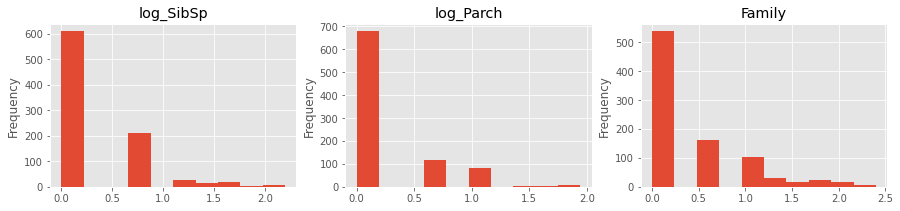

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
data['log_SibSp'].plot(kind='hist')
plt.title('log_SibSp')

plt.subplot(1,3,2)
data['log_Parch'].plot(kind='hist')
plt.title('log_Parch')

plt.subplot(1,3,3)
data['log_Family'].plot(kind='hist')
plt.title('Family')

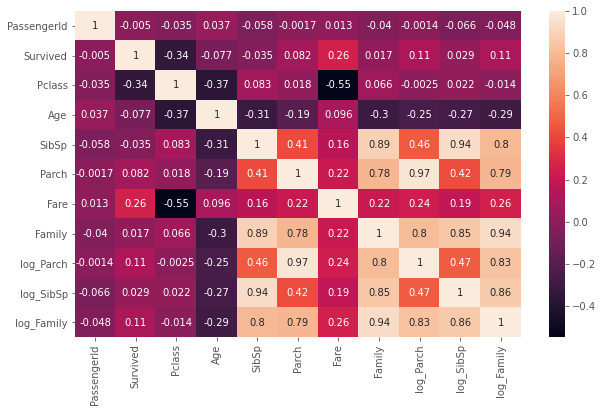

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

###Text Processing 

In [ ]:
data = train_df.copy()

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
punc = string.punctuation
data['clean_Name'] = data['Name'].str.replace('[{}]'.format(punc),'')
data['clean_Name'] = data['clean_Name'].str.lower()

In [ ]:
clean_name_text = ' '.join(c for c in data['clean_Name'])

In [ ]:
clean_name_text

'braund mr owen harris cumings mrs john bradley florence briggs thayer heikkinen miss laina futrelle mrs jacques heath lily may peel allen mr william henry moran mr james mccarthy mr timothy j palsson master gosta leonard johnson mrs oscar w elisabeth vilhelmina berg nasser mrs nicholas adele achem sandstrom miss marguerite rut bonnell miss elizabeth saundercock mr william henry andersson mr anders johan vestrom miss hulda amanda adolfina hewlett mrs mary d kingcome  rice master eugene williams mr charles eugene vander planke mrs julius emelia maria vandemoortele masselmani mrs fatima fynney mr joseph j beesley mr lawrence mcgowan miss anna annie sloper mr william thompson palsson miss torborg danira asplund mrs carl oscar selma augusta emilia johansson emir mr farred chehab fortune mr charles alexander odwyer miss ellen nellie todoroff mr lalio uruchurtu don manuel e spencer mrs william augustus marie eugenie glynn miss mary agatha wheadon mr edward h meyer mr edgar joseph holverson m

In [ ]:
wordcloud = WordCloud().generate(clean_name_text)

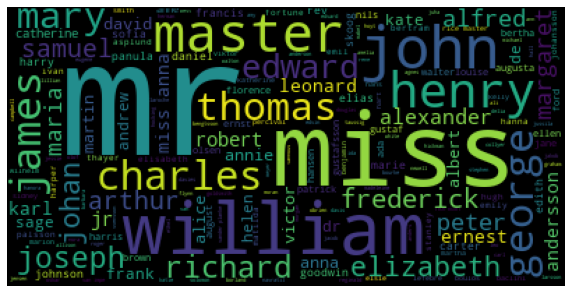

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



*   drop Name, Ticket
*   drop cabin เพราะ missing values เยอะเกิน



In [ ]:
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clean_Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund mr owen harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings mrs john bradley florence briggs thayer,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen miss laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle mrs jacques heath lily may peel,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen mr william henry,Mr


In [ ]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Ms            1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

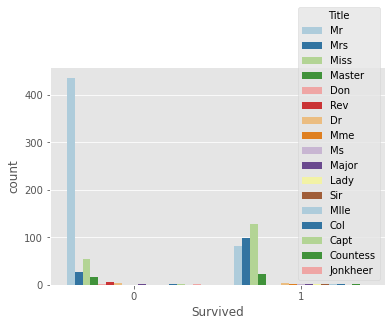

In [ ]:
sns.countplot(x='Survived', hue='Title', data=data, palette='Paired')

In [ ]:
data.groupby('Title').mean()[['Survived']].sort_values(by='Survived', ascending=False)

,Survived
Title,
Sir,1.000000
Countess,1.000000
Ms,1.000000
Mme,1.000000
Lady,1.000000
Mlle,1.000000
Mrs,0.792000
Miss,0.697802
Master,0.575000


### Embark

In [ ]:
data = train_df.copy()

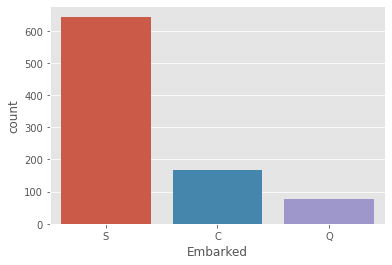

In [ ]:
sns.countplot(data['Embarked'])

In [ ]:
embarked_score = train_df.groupby('Embarked').mean()[['Fare']]
data = pd.merge(data, embarked_score, how='inner', on='Embarked')
embarked_score

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


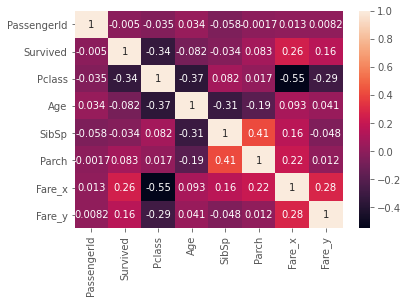

In [ ]:
sns.heatmap(data.corr(), annot=True)

## Data Cleaning

In [ ]:
print('Train dataset')
print(train_df.isna().sum())
print('\nTest dataset')
print(test_df.isna().sum())

Train dataset
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test dataset
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


*   clean Age โดยอ้างอิงอายุเฉลี่ยของ Pclass
*   clean Fare โดยอ้างอิง Fare เฉลี่ยของ Pclass
*   Cabin เอาออกไปเลย missing values เยอะเกิน
*   Embarked แทนด้วย mode


ลองเขียน function เพื่อ clean ข้อมูลหลายๆวิธี ลองดูว่าอันไหนดีที่สุด ไม่ได้ใช้ทุกอัน

In [ ]:
def clean_age_with_mean(df):
    df = df.copy()
    age_mean=df['Age'].mean()
    df['Age'] = df['Age'].fillna(age_mean)
    return df

In [ ]:
def clean_age_with_rand(df):
  df = df.copy()
  nan_age = df['Age'].isna()
  age_rand_pool = df[~nan_age]['Age']
  np.random.seed(0)
  age_rand = np.random.choice(age_rand_pool, size=sum(nan_age), replace=True)
  df.loc[nan_age, 'Age'] = age_rand
  return df

In [ ]:
def clean_age_with_pclass(df):
  df = df.copy()
  df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'))
  return df

In [ ]:
def clean_embarked_with_mode(df):
  df = df.copy()
  embarked_mode = df['Embarked'].mode()[0]
  df['Embarked'] = df['Embarked'].fillna(embarked_mode)
  return df

In [ ]:
def drop_columns(df):
  df = df.copy()
  df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
  return df

In [ ]:
def clean_fare_with_pclass(df):
  df = df.copy()
  df['Fare'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('mean'))
  return df

In [ ]:
def clean_df(df):
  df = df.copy()
  df = clean_age_with_pclass(df)
  df = clean_embarked_with_mode(df)
  df = clean_fare_with_pclass(df)
  return df

In [ ]:
train_df_clean = clean_df(train_df)
test_df_clean = clean_df(test_df)

## Feature Engineering

ลองเขียน function เพื่อ feature engineering หลายๆ วิธี ไม่ได้ใช้ทุกวิธี

In [ ]:
train_df_ = train_df_clean.copy()

In [ ]:
def discretize_fare(df):
  df = df.copy()
  df['Fare_bins'] = pd.qcut(df['Fare'], q=4, labels=False)
  df['Fare_bins'] = df['Fare_bins'].astype(int)
  return df

In [ ]:
def discretize_age(df):
  df = df.copy()
  df['Age_bins'] = pd.cut(df['Age'], bins=5, labels=False)
  df['Age_bins'] = df['Age_bins'].astype(int)
  return df

In [ ]:
def log_age(df):
  df = df.copy()
  df['Age'] = np.log(df['Age']+1)
  return df

In [ ]:
def add_family(df):
  df= df.copy()
  df['Family'] = df['SibSp']+df['Parch']
  return df

In [ ]:
def discretize_family(df):
  df = df.copy()
  df['Family_bins'] = pd.cut(np.log(df['Family']+1), bins=4, labels=False)
  df['Family_bins'] = df['Family_bins'].astype(int)
  return df

In [ ]:
def log_parch(df):
  df = df.copy()
  df['Parch'] = np.log(df['Parch']+1)
  return df

In [ ]:
def log_sibsp(df):
  df = df.copy()
  df['SibSp'] = np.log(df['SibSp']+1)
  return df

In [ ]:
def log_family(df):
  df = df.copy()
  df['Family'] = np.log(df['Family']+1)
  return df

In [ ]:
def add_title(df):
  df = df.copy()
  df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
  df['Title'] = df['Title'].apply(lambda x: x if x in ['Mr','Miss','Mrs','Master'] else 'Others')
  map_title = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Others':5}
  df['Title'] = df['Title'].map(map_title).astype(int)
  return df

In [ ]:
def label_encoder(df):
  df = df.copy()
  map_embarked = {'S':1, 'C':2, 'Q':3}
  map_sex = {'male':0, 'female':1}
  df['Embarked'] = df['Embarked'].map(map_embarked)
  df['Sex'] = df['Sex'].map(map_sex)
  return df

In [ ]:
def one_hot_encoder(df):
  df = df.copy()
  df = pd.get_dummies(df, columns=['Age_bins', 'Fare_bins', 'Family_bins', 'Title', 'Pclass', 'Sex' ,'Embarked'])
  return df 

In [ ]:
def poly_feature(df):
  df = df.copy()
  polyf = PolynomialFeatures(2)
  polyf.fit(df[['Age_bins','Pclass']].values)
  poly_col = ['poly_1','poly_2','poly_3','poly_4','poly_5','poly_6']
  for col in poly_col:
    df[col]=0
  df[poly_col] = polyf.transform(df[['Age_bins','Pclass']].values)
  return df

In [ ]:
def extract_feature(df):
  df = df.copy()
  df = clean_age_with_pclass(df)
  df = clean_embarked_with_mode(df)
  df = clean_fare_with_pclass(df)
  df = discretize_age(df)
  df = add_family(df)
  df = discretize_family(df)
  df = discretize_fare(df)
  df = add_title(df)
  df = label_encoder(df)
  # df = one_hot_encoder(df)
  df = poly_feature(df)
  return df

In [ ]:
train_df_extract = extract_feature(train_df)
test_df_extract = extract_feature(test_df)

In [ ]:
train_df_extract.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Family,Family_bins,Fare_bins,Title,poly_1,poly_2,poly_3,poly_4,poly_5,poly_6
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,1,1,1,0,1,1.0,1.0,3.0,1.0,3.0,9.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,2,1,1,3,3,1.0,2.0,1.0,4.0,2.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,1,2,1.0,1.0,3.0,1.0,3.0,9.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,2,1,1,3,3,1.0,2.0,1.0,4.0,2.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,2,0,0,1,1,1.0,2.0,3.0,4.0,6.0,9.0


In [ ]:
def feature_selection(df, dropped_feature):
  df = df.copy()
  return df.drop(dropped_feature, axis=1)

In [ ]:
dropped_feature = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Family', 'poly_1', 'poly_2', 'poly_3']
train_df_selected = feature_selection(train_df_extract, dropped_feature)
test_df_selected = feature_selection(test_df_extract, dropped_feature)

In [ ]:
train_df_selected.head()

,Survived,Pclass,Sex,Embarked,Age_bins,Family_bins,Fare_bins,Title,poly_4,poly_5,poly_6
0,0,3,0,1,1,1,0,1,1.0,3.0,9.0
1,1,1,1,2,2,1,3,3,4.0,2.0,1.0
2,1,3,1,1,1,0,1,2,1.0,3.0,9.0
3,1,1,1,1,2,1,3,3,4.0,2.0,1.0
4,0,3,0,1,2,0,1,1,4.0,6.0,9.0


In [ ]:
X_train = train_df_selected.drop('Survived', axis=1)
y_train = train_df_selected['Survived']
X_test = test_df_selected.copy()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate Model

In [ ]:
def cross_validation(model, features, labels):
  scores = cross_val_score(model, features, labels, cv=5, scoring='accuracy')
  return scores

In [ ]:
def cross_predict(model, features, labels):
  prediction = cross_val_predict(model, features, labels, cv=5)
  return prediction

In [ ]:
lgr = LogisticRegression()
score_lgr = cross_validation(lgr, X_train_scaled, y_train)
print('Logistic Regression score: {} / mean={:.3f}'.format(score_lgr, score_lgr.mean()))

gbc = GradientBoostingClassifier(random_state=0)
score_gbc = cross_validation(gbc, X_train_scaled, y_train)
print('Gradient Boosting Classifier: {} / mean={:.3f}'.format(score_gbc, score_gbc.mean()))

rfc = RandomForestClassifier(random_state=0)
score_rfc = cross_validation(rfc, X_train_scaled, y_train)
print('Random Forest Classifier: {} / mean={:.3f}'.format(score_rfc, score_rfc.mean()))

Logistic Regression score: [0.79888268 0.82022472 0.80898876 0.79775281 0.81460674] / mean=0.808
Gradient Boosting Classifier: [0.82122905 0.79213483 0.80898876 0.78651685 0.84831461] / mean=0.811
Random Forest Classifier: [0.81005587 0.78651685 0.81460674 0.79775281 0.85955056] / mean=0.814




* หลังจากลอง feature engineering หลายๆวิธี วิธีนี้ได้ accuracy สูงที่สุด





### Hyperparameter Tuning

In [ ]:
def search_best_praram(model, param_grid, feature, label):
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
  grid_search.fit(feature, label)
  return grid_search

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
param_grid = {'learning_rate':[0.1, 0.01], 'n_estimators':[50,100, 250, 500], 'max_depth':[3, 4, 5, 6, 7]}
grid_search = search_best_praram(gbc, param_grid, X_train_scaled, y_train)

In [ ]:
grid_search.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
cv_result = grid_search.cv_results_

In [ ]:
for score, param in zip(cv_result['mean_test_score'], cv_result['params']):
  print(score, param)

0.8125478626577113 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.811436821291821 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.8159500345238844 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
0.8226916075575922 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.80585022911305 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
0.8159374803841567 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.8204444165463561 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250}
0.8114619295712762 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
0.813709120582512 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
0.8103383340656583 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
0.8125980792166217 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
0.8103508882053859 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
0.8092210156299039 {'learning_rate': 0.1, 'max_depth': 6, '

In [ ]:
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=3, n_estimators=250)
score_gbc = cross_validation(gbc, X_train_scaled, y_train)
print('Gradient Boosting Classifier: {} / mean={:.3f}'.format(score_gbc, score_gbc.mean()))

Gradient Boosting Classifier: [0.84357542 0.82022472 0.82022472 0.78089888 0.85955056] / mean=0.825


In [ ]:
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=3, n_estimators=250)
prediction = cross_predict(gbc, X_train_scaled, y_train)

In [ ]:
print('Classification report')
print(classification_report(y_train, prediction))
print('\nConfusion Matrix')
print(confusion_matrix(y_train, prediction))

Classification report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       549
           1       0.84      0.67      0.75       342

    accuracy                           0.82       891
   macro avg       0.83      0.80      0.81       891
weighted avg       0.83      0.82      0.82       891


Confusion Matrix
[[505  44]
 [112 230]]


### Submit the result to Kaggle via Kaggle API

In [ ]:
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=3, n_estimators=250)
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
submission_prediction = gbc.predict(X_test_scaled)

In [ ]:
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],
                           'Survived':submission_prediction})

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c titanic -f submission.csv -m "Third commit"

100% 2.77k/2.77k [00:08<00:00, 327B/s]
Successfully submitted to Titanic: Machine Learning from Disaster

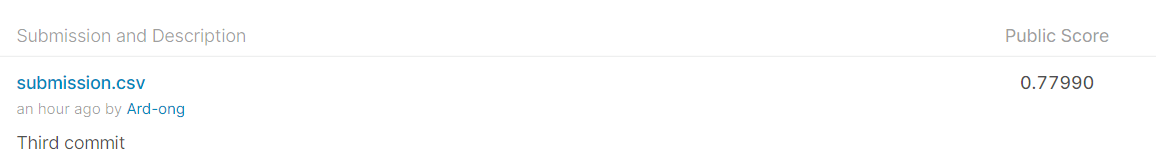

### Visualize the result

In [ ]:
def cross_predict_mod(model, features, labels, cv=5):
  prediction = cross_val_predict(model, features, labels, cv=cv)
  return prediction

In [ ]:
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=3, n_estimators=250)
prediction_on_train = cross_predict_mod(gbc, X_train_scaled, y_train, cv=5)

In [ ]:
#Decompose the prediction into 2-Dimension
pca = PCA(2)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train_dc = pca.transform(X_train_scaled)
X_test_dc = pca.transform(X_test_scaled)

In [ ]:
train_df_dc = pd.DataFrame(X_train_dc)
train_df_dc = train_df_dc.rename(columns={0:'x', 1:'y'})
train_df_dc['Survived'] = train_df['Survived']
train_df_dc['Predicted_Survived'] = prediction_on_train
train_df_dc['True_or_False'] = (train_df_dc['Survived']==train_df_dc['Predicted_Survived'])

Text(0.5, 1.0, 'True or False Predicted in Training Dataset')

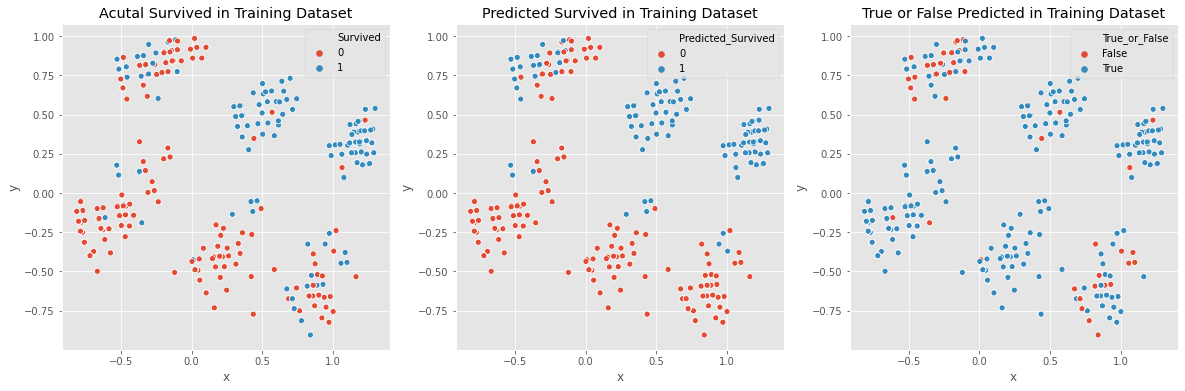

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='x', y='y', hue='Survived', data=train_df_dc)
plt.title('Acutal Survived in Training Dataset')

plt.subplot(1,3,2)
sns.scatterplot(x='x', y='y', hue='Predicted_Survived', data=train_df_dc)
plt.title('Predicted Survived in Training Dataset')

plt.subplot(1,3,3)
sns.scatterplot(x='x', y='y', hue='True_or_False', data=train_df_dc)
plt.title('True or False Predicted in Training Dataset')

In [ ]:
test_df_dc = pd.DataFrame(X_test_dc)
test_df_dc = test_df_dc.rename(columns={0:'x', 1:'y'})
test_df_dc['Predicted_Survived'] = submission_prediction

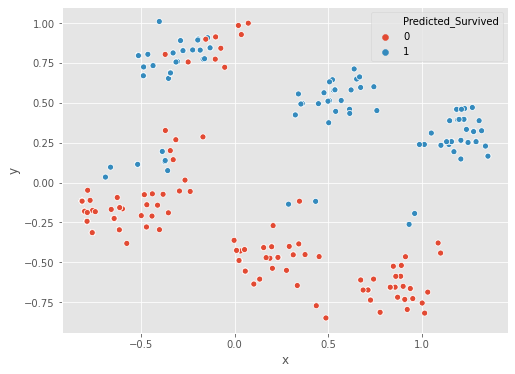

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='x', y='y', hue='Predicted_Survived', data=test_df_dc)